## 4D Objects By Change - Analysis

This notebook explains how the extraction of *4D Objects By Change* ([Anders et al., 2020](#references)) is run in `py4dgeo`. For details about the algorithm, we refer to the articles by Anders et al. ([2020; 2021]((#references))).

In [1]:
import py4dgeo

We again trigger a dynamic fetch of the test data for this notebook from the [py4dgeo test data repository](https://github.com/ssciwr/py4dgeo-test-data/):

In [2]:
py4dgeo.ensure_test_data_availability()

The necessary data for the analysis is stored in an analysis file. There is a dedicated [notebook on creating these analysis files](4dobc-creation.ipynb). In this notebook, we assume that the file already exists and contains a space-time array with corresponding metadata. You can pass an absolute path to the analysis class or have `py4dgeo` locate files for relative paths:

In [3]:
analysis = py4dgeo.SpatiotemporalAnalysis("synthetic.zip")

If needed, the data can be retrieved from the analysis object. Note that this is a lazy operation, meaning that only explicitly requesting such data will trigger the retrieval from disk into memory:

In [4]:
analysis.distances

array([[0.00000000e+00, 2.58459742e-07, 5.09761587e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.58459742e-07, 5.09761587e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.58459742e-07, 5.09761587e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.58459742e-07, 5.09761587e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.58459742e-07, 5.09761587e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.58459742e-07, 5.09761587e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Next, we will construct an algorithm object. You can do so by simply instatiating the `RegionGrowingAlgorithm`:

In [5]:
algo = py4dgeo.RegionGrowingAlgorithm(neighborhood_radius=2.0, seed_subsampling=30)

The `neighborhood_radius` parameter for this algorithm is of paramount importance: At each core point, a radius search with this radius is performed to determine which other core points are considered to be local neighbors during region growing. This allows us to perform region growing on a fully unstructured set of core points. The `seed_subsampling` parameter is used to speed up the generation of seed candidates by only investigating every n-th core point (here n=30) for changes in its timeseries. This is only done to improve the usability of this notebook - for real, full analysis you should omit that parameter (using its default of `1`).

Next, we execute the algorithm on our `analysis` object:

In [6]:
objects = algo.run(analysis)

[2022-06-16 14:48:39][INFO] Starting: Smoothing temporal data
[2022-06-16 14:48:39][INFO] Finished in 0.0485s: Smoothing temporal data
[2022-06-16 14:48:39][INFO] Restoring epoch from file 'C:\Users\k53\AppData\Local\Temp\tmppzkhrenw\corepoints.zip'
[2022-06-16 14:48:39][INFO] Starting: Find seed candidates in time series
[2022-06-16 14:48:44][INFO] Finished in 5.2946s: Find seed candidates in time series
[2022-06-16 14:48:44][INFO] Starting: Sort seed candidates by priority
[2022-06-16 14:48:44][INFO] Restoring epoch from file 'C:\Users\k53\AppData\Local\Temp\tmpc1ttvi69\corepoints.zip'
[2022-06-16 14:48:44][INFO] Finished in 0.1144s: Sort seed candidates by priority
[2022-06-16 14:48:44][INFO] Starting: Performing region growing on seed candidate 1/70
[2022-06-16 14:48:45][INFO] Finished in 0.1452s: Performing region growing on seed candidate 1/70
[2022-06-16 14:48:45][INFO] Starting: Performing region growing on seed candidate 44/70
[2022-06-16 14:48:45][INFO] Finished in 0.1797s: P

The algorithm returns a list of *4D objects-by-change* (segments in the space time domain) which we can, e.g., plot interactively:

[2022-06-16 14:49:12][INFO] Restoring epoch from file 'C:\Users\k53\AppData\Local\Temp\tmppzwhmr2g\corepoints.zip'


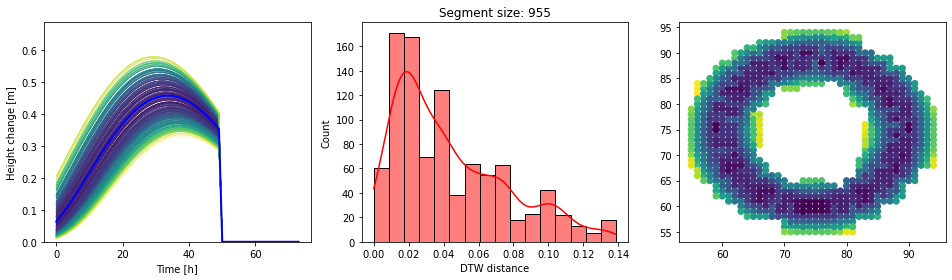

In [7]:
objects[0].plot()

Similarly to how the `M3C2` class can be customized by subclassing from it, it is possible to create subclasses of `RegionGrowingAlgorithm` to customize some aspects of the region growing algorithm (not covered in detail in this notebook).

<a id='references'></a>
## References

* Anders, K., Winiwarter, L., Lindenbergh, R., Williams, J. G., Vos, S. E., & Höfle, B. (2020). 4D objects-by-change: Spatiotemporal segmentation of geomorphic surface change from LiDAR time series. ISPRS Journal of Photogrammetry and Remote Sensing, 159, pp. 352-363. doi: [10.1016/j.isprsjprs.2019.11.025](https://doi.org/10.1016/j.isprsjprs.2019.11.025).
* Anders, K., Winiwarter, L., Mara, H., Lindenbergh, R., Vos, S. E., & Höfle, B. (2021). Fully automatic spatiotemporal segmentation of 3D LiDAR time series for the extraction of natural surface changes. ISPRS Journal of Photogrammetry and Remote Sensing, 173, pp. 297-308. doi: [10.1016/j.isprsjprs.2021.01.015](https://doi.org/10.1016/j.isprsjprs.2021.01.015).